# Histogram equalization

**Author: Uzhva Denis Romanovich**

**Lecturer: Soloviev Igor Pavlovich**

## Histogram of an image and global equalization
### Theory

A histogram of an image is a function $h(r_k) = n_k$, which returns the number $n_k$ of pixels of the *k*th intensity value $r_k$. 
In practice, a normalized variant of such a function is usually considered: $p(r_k) = n_k/HW$, where $H$ and $W$ are image height and width in pixels correspondingly. 
Being normalized as shown, the function $p(r_k)$ becomes, by definition, a probability distribution function $p_r(r_k)$ of a pixel $r$ to have an intensity level $r_k$.

By examining a histogram of an image, one may suggest a conclusion on the balance of bright and dark pixels of the picture. 
For example, an overexposed image would have a significant bias towards high values of $r_k$ on its histogram; the same can be applied to an opposite case.
Thus, a balanced image with fine contrast is supposed to have a uniform distribution $p(r_k)$ or a close to uniform one. 

Given the above, one may transform an image to obtain a desired shape of a histogram.
Such a transformation is called *equalization*: it is basically a function $s = T(r)$ with the following properties:
1. $T(r)$ is a strictly monotonically increasing function in the interval $0 \leq r \leq L - 1$, where $L - 1$ is the maximum level of intensity of an image.
2. $0 \leq T(r) \leq L - 1$ for $0 \leq r \leq L - 1$.

A very important transformation function is the following one:
$$
\begin{equation}
s = T(r) = (L - 1) \int_0^r p_r(w)dw.
\tag{1}
\end{equation}
$$
The main property of such a function that, after this transformation is applied, the PDF $p_s(s)$ becomes uniform with height $\frac{1}{L - 1}$, independently of $p_r(r)$.
This property can be simply derived from the fact that $p_s(s) = p_r(r) | \frac{r}{s} |$, followed by direct differentiation of the equation $T(r)$. 
hich can be rewritten for the discrete case like this:
$$
\begin{equation}
s_k = T(r_k) = (L - 1) \sum_{j = 0}^k p_r(r_j) = \frac{L - 1}{HW} \sum_{j = 0}^k n_j. 
\tag{2}
\end{equation}
$$

### Code

#### A histogram maker

In [1]:
import numpy as np


def im_hist(img, normalize=True):
    Lm1 = 256
    if len(img.shape) == 3:
        channels = img.shape[-1]
        hist_arr = np.zeros((channels, Lm1))
        for rk in range(Lm1):
            where_rk = np.argwhere(img == rk)
            for ch in range(channels):
                hist_arr[ch, rk] = np.argwhere(where_rk[:, 2] == ch).size
    else:
        hist_arr = np.zeros((Lm1))
        for rk in range(Lm1):
            where_rk = np.argwhere(img == rk)
            hist_arr[rk] = where_rk.shape[0]
            
    if normalize:
        hist_arr /= (img.shape[0] * img.shape[1])
        
    return hist_arr

#### $T(r)$ as defined in (2)

In [ ]:
import numpy as np


def eq_uniform(img):
    pass

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# https://www.reddit.com/r/Minecraft/comments/4xr7bn/seus_shaders_way_too_bright_and_i_dont_know_how/
img_2 = Image.open('./mc.png')
img_3 = Image.open('./snow.jpg')

In [17]:
# represent the images as tensors
img_2_np = np.array(img_2)
img_3_np = np.array(img_3)
print('Picture dimensions:')
print(img_2_np.shape)
print(img_3_np.shape)

Picture dimensions:
(1080, 1920, 3)
(2736, 3648, 3)


In [18]:
hist_3 = im_hist(img_3_np)

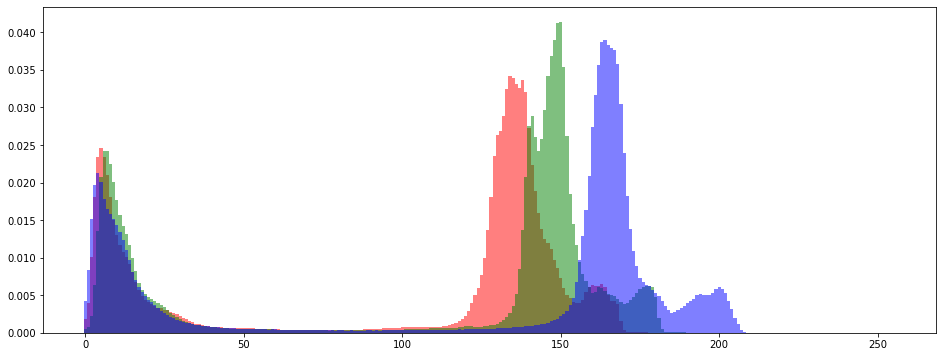

In [57]:
plt.figure(figsize=(16, 6))
plt.bar(np.arange(256), hist_3[0], width=1., alpha=0.5, color='r')
plt.bar(np.arange(256), hist_3[1], width=1., alpha=0.5, color='g')
plt.bar(np.arange(256), hist_3[2], width=1., alpha=0.5, color='b')
plt.show()